In [107]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings("ignore")

In [90]:
df = pd.read_csv("NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [91]:
df = df.iloc[:, 2:6]
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT
0,315000,2,2.000000,1400.0
1,195000000,7,10.000000,17545.0
2,260000,4,2.000000,2015.0
3,69000,3,1.000000,445.0
4,55000000,7,2.373861,14175.0


In [92]:
df.isna().sum()

PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
dtype: int64

Text(0, 0.5, 'Price')

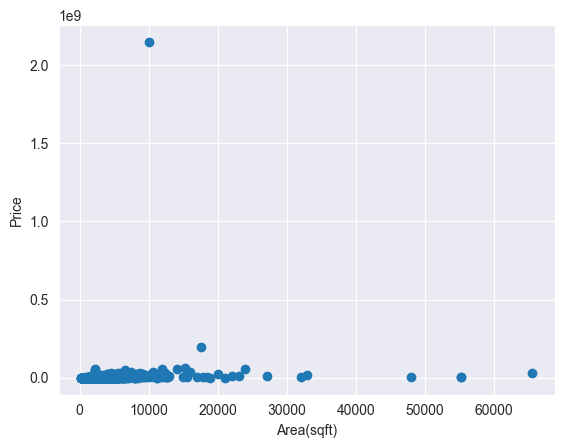

In [93]:
plt.scatter(df['PROPERTYSQFT'],df['PRICE'])
plt.xlabel("Area(sqft)")
plt.ylabel("Price")

In [94]:
correlations = df.corr()
print(correlations['PRICE'])

PRICE           1.000000
BEDS            0.052189
BATH            0.079371
PROPERTYSQFT    0.110889
Name: PRICE, dtype: float64


In [95]:
df = df.drop(columns=['BEDS', 'BATH'])

In [96]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
X_train.shape

(3600, 1)

In [100]:
y_train.shape

(3600,)

In [101]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

Coefficient or slope: [3850108.06061976]
Intercept: 2508038.3024999998


In [108]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)
np.mean(validation_score)

-1306603602712497.5

In [ ]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

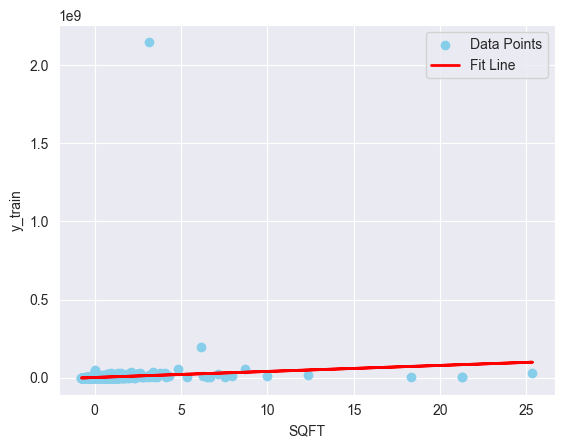

In [103]:
plt.scatter(X_train, y_train, color='skyblue', label='Data Points')
plt.plot(X_train, regression.predict(X_train), color='red', linewidth=2, label='Fit Line')

plt.xlabel('SQFT')
plt.ylabel('y_train')
plt.legend()

plt.show()

In [104]:
y_pred = regression.predict(X_test)

In [109]:
residuals=y_test-y_pred
print(residuals)

596    -3.167537e+06
4507   -4.030771e+05
3049    2.133414e+06
2957    8.981472e+05
8      -3.587034e+04
            ...     
1260   -2.245007e+06
325     1.442244e+06
1051    8.810030e+05
2750   -1.538840e+05
3071    4.332092e+05
Name: PRICE, Length: 1201, dtype: float64


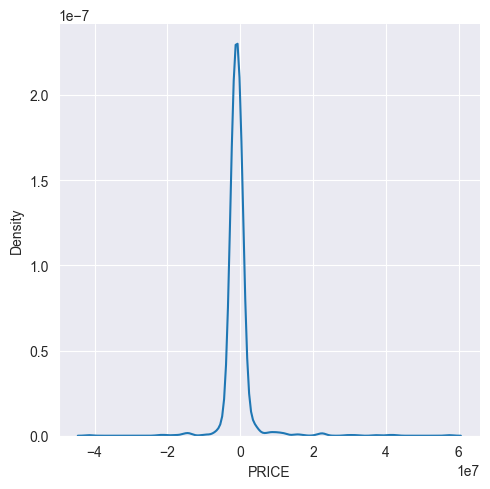

In [110]:
sns.displot(residuals,kind='kde')

In [105]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error: 18722689206858.01
Mean Absolute Error: 1892500.4365195846
Root Mean Squared Error: 4326972.290974142


In [106]:
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R2 Score:",r2)
print("Adjusted R2 Score:",adjusted_r2)

R2 Score: 0.15291907189587817
Adjusted R2 Score: 0.1526836408430421


In [86]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[ 1617649.69303494 -1806260.09521579  3156723.94236076 ...
  -961340.56150555 -2601600.29452397 -3661385.09740967]


In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.014
Method:                 Least Squares   F-statistic:                              11.29
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                    7.93e-11
Time:                        14:37:23   Log-Likelihood:                         -67736.
No. Observations:                3600   AIC:                                  1.355e+05
Df Residuals:                    3595   BIC:                                  1.355e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.054e+06   1.01e+06     -1.041      0.298   -3.04e+06    9.31e+05
x2          1.931e+06   1.04e+06      1.850      0.064   -1.16e+05    3.98e+06
x3          3.328e+06    6.8e+05      4.896      0.000       2e+06    4.66e+06
x4         -5.884e+04   6.99e+05     -0.084      0.933   -1.43e+06    1.31e+06
x5         -1.878e+06   7.01e+05     -2.679      0.007   -3.25e+06   -5.04e+05
==============================================================================
Omnibus:                    12037.307   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1787958243.163
Skew:                          58.179   Prob(JB):                         0.00
Kurtosis:                    3453.534   Cond. No.                         3.36
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""